# Anomaly detection

Będziemy używać zbioru EKG z [PhysioNet](http://physionet.org/physiobank/database/apnea-ecg/). Dokładniejszy opis można znaleźć tu: https://github.com/mrahtz/sanger-machine-learning-workshop

In [2]:
from __future__ import print_function
import ekg_data

ekg_filename = 'data_cl/a02.dat'
ekg_data_save = ekg_data.read_ekg_data(ekg_filename)
print(ekg_data_save.shape)

(3182000,)


Nasze dane to lista liczb

In [3]:
print("ekg_data[0]:\t", ekg_data_save[0])
print("ekg_data[1]:\t", ekg_data_save[1])
print("ekg_data.min:\t", ekg_data_save.min())
print("ekg_data.max:\t", ekg_data_save.max())

ekg_data[0]:	 -4.0
ekg_data[1]:	 -4.0
ekg_data.min:	 -572.0
ekg_data.max:	 580.0


Jest to sygnał więc można go narysować

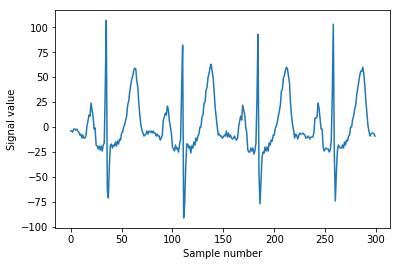

In [4]:
# IPython 'magic' command to set the matplotlib backend to display
# in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

n_samples_to_plot = 300
plt.plot(ekg_data_save[0:n_samples_to_plot])
plt.xlabel("Sample number")
plt.ylabel("Signal value")
plt.show()

Jako zbiór treningowy weźmy kilka pierwszych wartości

In [5]:
ekg_data = ekg_data_save[0:8192]

## Windowing

Żeby pracować z danymi z szeregu czasowego zwykle go okienkujemy. 

ZADANIE: Proszę przekształcić ekg_data do postaci wektorowej - idziemy co 2 i tworzymy wektory długości 32

In [6]:
#

ZADANIE: Proszę narysować przykładowe segmenty

In [7]:
#

## Clustering

ZADANIE: Poklastrować dane tak żeby znaleźć zbiór typowych/reprezentatywnych fali - weźmy 150 grup

In [8]:
#

ZADANIE: Narysować reprezentatów klastrów

In [9]:
#

Fala będzie anomalią jeśli będzie daleko od naszego modelu:
* dla każdej fali szukamy najbliższego centra
* dopasowanie to odległość od najbliższego centra



ZADANIE: Zobaczmy jak wykląda dopasowanie wybranej fali do centra (narysuj dwie fale na jednym rysunku)

In [11]:
#

ZADANIE: Dla zbioru testowego (kolejne 8192 obserwacje) i treningowego policz dopasowanie. Narysuj oryginalną falę i falę dopasowania. Oceń które fale są anomaliami

In [12]:
#

ZADANIE: Stwórz ręcznie anomalię, np. wyzeruj 5 współrzędnych w oryginalnym sygnale - powtórze poprzednie zadanie na takim sygnale

In [13]:
#